In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [3]:
pd.set_option('display.max_rows',1000)

### General functions

In [4]:
def df_frag(column, value):
    return data[data[column] == value]

In [5]:
def get_nulls(df):
    return df[df['imdb_rating'].isnull()].shape

In [6]:
def drop_column(df,column):
    return df.drop(column, axis=1, inplcae = True)

### General Analysis

In [7]:
#data = pd.read_csv('data\\notebook_df\\final_data.csv')

In [8]:
data = pd.read_csv('data\\notebook_df\\final_df.csv')

In [9]:
data.imdb_rating.isnull().sum()

4156

In [10]:
data = data[~data.imdb_rating.isnull()]

In [11]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
platform        object
full_cast       object
imdb_rating     object
dtype: object

#### I want to change the name of two columns to a more easy to understand one

In [12]:
data.rename(columns={'rating':'PG',
                     'title':'name',
                     'listed_in':'genres'}, inplace = True)

In [13]:
data.columns

Index(['show_id', 'type', 'name', 'director', 'cast', 'country', 'date_added',
       'release_year', 'PG', 'duration', 'genres', 'description', 'platform',
       'full_cast', 'imdb_rating'],
      dtype='object')

We need to change the format of imdb_rating to float

In [14]:
# The rating extrcated from IMdb came wiht a ",", so before changing its type to float we need to replace it by "."
data.imdb_rating = data.imdb_rating.replace(',','.',regex = True)
data = data.astype({'imdb_rating':'float64'})

In [15]:
data = data.astype({'imdb_rating':'float64'})

In [16]:
# Lets round the rating to 1 decimal number 
data = data.round({'imdb_rating':1})

### Drop irrelevant columns

In [17]:
data = data.drop(['show_id', 'director', 'cast', 'description'], axis = 1)

## Divisions and Analysis

### Average Rating of Whole Dataset

In [18]:
data.shape

(13867, 11)

In [19]:
data.imdb_rating.mean()

6.23439100021634

### General Analysis

In [20]:
data.imdb_rating.describe()

count    13867.000000
mean         6.234391
std          1.294528
min          1.100000
25%          5.500000
50%          6.400000
75%          7.200000
max          9.700000
Name: imdb_rating, dtype: float64

In [21]:
data[data.imdb_rating > 7.2].shape

(3090, 11)

### Division between Series and Movies

In [22]:
movies = df_frag('type', 'Movie')

In [23]:
movies.shape

(11089, 11)

In [24]:
tv_shows = df_frag('type', 'TV Show')

In [25]:
tv_shows.shape

(2778, 11)

### Division bewteen streaming platforms

#### Netflix

In [26]:
netflix = df_frag('platform', 'netflix')

In [27]:
netflix.shape

(6864, 11)

In [28]:
get_nulls(netflix)

(0, 11)

#### Amazon

In [29]:
amazon = df_frag('platform', 'amazon')

In [30]:
amazon.shape

(6079, 11)

#### Disney

In [31]:
disney = df_frag('platform', 'disney')

In [32]:
disney.shape

(924, 11)

Cleaning the **genres** column to have consistency 

In [110]:
data.genres = data.genres.replace(to_replace = 'Children & Family', value = 'Family', regex=True)

In [111]:
data.genres = data.genres.replace(to_replace = 'Entertainment', value = '', regex=True)

In [112]:
data.genres = data.genres.replace(to_replace = 'Action-Adventure', value = 'Action & Adventure', regex=True)

In [113]:
data.genres = data.genres.replace(to_replace = 'Music & Music & Musicalss', value = 'Music', regex=True)º

In [115]:
data.genres = data.genres.replace(to_replace = 'British', value = '', regex=True)

In [116]:
data.genres = data.genres.replace(to_replace = 'Spanish-Language', value = '', regex=True)

In [117]:
data.genres = data.genres.replace(to_replace = 'Arthouse', value = 'Art', regex=True)

In [123]:
data.genres = data.genres.replace(to_replace = 'Classic & Cult & Cult', value = 'Classic', regex=True)

In [119]:
data.genres = data.genres.replace(to_replace = 'Animals & Nature', value = 'Science & Nature', regex=True)

In [121]:
data.genres = data.genres.replace(to_replace = 'Music & Musicals', value = 'Music', regex=True)

In [122]:
data.genres = data.genres.replace(to_replace = 'Music Videos and Concerts', value = 'Concerts', regex=True)

In [33]:
data.genres = data.genres.replace(to_replace = 'TV', value = '', regex=True)

In [34]:
data.genres = data.genres.replace(to_replace = 'Movies', value = '', regex=True)

In [35]:
data.genres = data.genres.replace(to_replace = 'Shows', value = '', regex=True)

In [36]:
data.genres = data.genres.replace(to_replace = 'Series', value = '', regex=True)

In [37]:
data.genres = data.genres.replace(to_replace = 'Features', value = '', regex=True)

In [136]:
data['genres'] = data['genres'].replace('Classic& Cult', 'Classic', regex=True)

In [39]:
data['genres'] = data['genres'].replace('Documentaries', 'Documentary', regex=True)

In [40]:
data['genres'] = data['genres'].replace('Dramas', 'Drama', regex=True)

In [41]:
data['genres'] = data['genres'].replace('Faith and Spirituality', 'Faith & Spirituality', regex=True)

In [42]:
data['genres'] = data['genres'].replace("Kids'", 'Kids', regex=True)

In [43]:
data['genres'] = data['genres'].replace('Dance', 'Music & Musicals', regex=True)

In [44]:
data['genres'] = data['genres'].replace('Concert Film', 'Music & Musicals', regex=True)

In [45]:
data['genres'] = data['genres'].replace('Musical', 'Music & Musicals', regex=True)

In [46]:
data['genres'] = data['genres'].replace('Mysteries', 'Mystery', regex=True)

In [47]:
data['genres'] = data['genres'].replace('Romantic', 'Romance', regex=True)

In [48]:
data['genres'] = data['genres'].replace('Science Fiction', 'Sci-Fi & Fantasy', regex=True)

In [49]:
data['genres'] = data['genres'].replace('Spy/Espionage', 'Espionage', regex=True)

In [50]:
data['genres'] = data['genres'].replace('Stand-Up Comedy & Talk', 'Stand-Up Comedy', regex=True)

In [124]:
data['genres'] = data['genres'].replace('Talk Show and Talk Show and Variety',
                                                            'Talk Show', regex=True)

In [125]:
data['genres'] = data['genres'].replace('Talk Show and Variety',
                                                            'Talk Show', regex=True)

In [52]:
data['genres'] = data['genres'].replace('Variety', 'Talk Show and Variety', regex=True)

In [53]:
data['genres'] = data['genres'].replace('Thrillers', 'Thriller', regex=True)

In [54]:
data['genres'] = data['genres'].replace('Soap Opera / Melodrama', 'Soap Opera', regex=True)

In [55]:
data['genres'] = data['genres'].replace('and Culture', '', regex=True)

### Further differentiation

#### Year

In [56]:
year_list = list(data.release_year.unique())

#### I want to separate all unique values of listed_in and countries

In [57]:
def extract_uniques(lista):

    unique_values = []

    for number in range(0,len(lista)):
        try:
            words = lista[number].split(',')
        except:
            pass
        for word in words:
            if word.strip() not in unique_values:
                unique_values.append(word.strip())
    return unique_values

In [58]:
def complete_list(lista):

    total_values = []
    
    for number in range(0,len(lista)):
        try:
            words = lista[number].split(',')
        except:
            pass
        for word in words:
            total_values.append(word.strip())
    return total_values        

In [206]:
def columns_rating(column_1, column_2, name_1, name_2):
    
    #Create list of tuples combining two columns. In this case imdb_rating and genres
    
    df = list(zip(column_1, column_2))

    #Create two i
    
    lista_1 = []
    lista_2 = []


    for number in range(0,len(df)):
        try:
            words = df[number][0].split(',')
        except:
            pass
        
        for word in words:
            
            lista_1.append(word.strip())
            lista_2.append(df[number][1])
            
            result = pd.DataFrame()
            result[1] = lista_1
            result[2]= lista_2
    
        result.rename(columns = {1:name_1,2:name_2}, inplace=True)
    return result


#### Genres

In [137]:
complete_genres = columns_rating(data.genres, data.imdb_rating)

In [ ]:
complete_genres[complete_genres.genre != ''].genre.value_counts()

In [102]:
len(complete_genres)

29624

#### Modifications to have better data 

There are a series of genres that are not really genres and we can delete. These are: Young Adult Audience, and Culture, Korean Spanish Language. I'm going to keep the international genre becuase it can refer to movies than involve global issues, but if this is not the case, I will drop it too.

In [61]:
complete_genres_clean = complete_genres[(complete_genres['genre'] != 'and Culture') & (complete_genres['genre'] != 'Young Adult Audience') &
                   (complete_genres['genre'] != 'Korean') & (complete_genres['genre'] != 'Spanish-Language') & 
                   (complete_genres['genre'] != '')]

In [143]:
top_genres = complete_genres.groupby('genre').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).head(10)

In [144]:
bottom_genres = complete_genres.groupby('genre').agg({
    'rating':'mean'}).sort_values(by='rating', ascending=False).tail(10)

In [145]:
display_side_by_side(top_genres,bottom_genres, titles=['top_10_genres', 'bottom_10_genres'])

,rating
genre,
Survival,7.650000
Korean,7.535211
Classic,7.494068
Docuseries,7.489552
Travel,7.400000
Concerts,7.303448
Crime,7.253353
Anime,7.250254
Teen,7.244643


#### Countries

In [146]:
countries = data[~data.country.isnull()]

In [147]:
countries = countries[~countries.country.str.contains(',')]

In [148]:
countries = countries[(countries.country != 'unknown') & (~countries.country.isnull())]

In [149]:
v = countries.country.value_counts()
countries = countries[countries.country.isin(v.index[v.gt(15)])]

In [ ]:
top_countries = countries.groupby('country').agg({
    'imdb_rating':'mean'}).sort_values(by='imdb_rating', ascending=False).head(20)

In [71]:
bottom_countries = countries.groupby('country').agg({
    'imdb_rating':'mean'}).sort_values(by='imdb_rating', ascending=False).tail(20)

In [72]:
display_side_by_side(top_countries,bottom_countries, titles=['top_10_countries', 'bottom_10_countries'])

,imdb_rating
country,
Japan,7.298907
South Korea,7.233333
United Kingdom,6.897668
Australia,6.780000
Taiwan,6.742647
Pakistan,6.717647
China,6.489130
Colombia,6.486207
Indonesia,6.455882


### Analysis

#### Data count

### Platform quality

In [151]:
data.groupby('platform').agg({'imdb_rating':
                                    'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
disney,6.511039
netflix,6.440559
amazon,5.959549


### Platform quality 

In [152]:
data[data.type=='TV Show'].groupby('platform').agg({'imdb_rating':
                                                                'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
netflix,7.115450
amazon,7.050188
disney,6.877778


In [153]:
data[data.type=='Movie'].groupby('platform').agg({'imdb_rating':
                                                              'mean'}).sort_values('imdb_rating', ascending = False)

,imdb_rating
platform,
disney,6.392990
netflix,6.208904
amazon,5.794508


### What platform has the best title

In [154]:
top_100_movies = data[data.type == 'Movie'].sort_values('imdb_rating', ascending = False).head(100)

In [155]:
top_100_shows = data[data.type == 'TV Show'].sort_values('imdb_rating', ascending = False).head(100)

In [156]:
top_100_movies.groupby('platform').agg({'name':'count', 'imdb_rating':'mean'})

,name,imdb_rating
platform,,
amazon,51,8.682353
disney,3,8.600000
netflix,46,8.689130


In [157]:
top_100_shows.groupby('platform').agg({'name':'count', 'imdb_rating':'mean'})

,name,imdb_rating
platform,,
amazon,31,8.967742
disney,5,9.080000
netflix,64,8.907813


In [216]:
def mean_values(df, column_1, column_2):
    
    df_column = columns_rating(df[column_1], df[column_2], column_1, column_2)
    df_clean = df_column[(df_column[column_1] != 'unknown') & (df_column[column_1] != '')]
    df_mean_values = df_column.groupby(column_1).agg({
    column_2:'mean', column_1:'count'}).sort_values(by=column_2, ascending=False).head(20)
    
    return df_mean_values

In [217]:
 = mean_values(top_100_movies,'genres', 'imdb_rating')

In [161]:
display_side_by_side(mv_100_gnre,mv_100_cntry, titles=['movie top genres', 'movie top countries'])

NameError: name 'mv_100_gnre' is not defined

In [86]:
display_side_by_side(tv_100_gnre,tv_100_cntry, titles=['tv top genres', 'tv top countries'])

,imdb_rating,genres
genres,,
LGBTQ,9.200000,1
Thriller,9.100000,2
Arts,9.100000,1
Entertainment,9.100000,1
Science & Nature,9.083333,6
Docuseries,9.035294,17
Suspense,9.033333,3
Historical,9.000000,1
Sports,9.000000,2


### Differentiation for analysis

In [223]:
amazon_t = data[(data.platform == 'amazon')]

In [224]:
amazon_movie_len = len(amazon_t[amazon_t.type == 'Movie'])

In [225]:
amazon_show_len = len(amazon_t[amazon_t.type == 'TV Show'])

In [226]:
netflix_t = data[(data.platform == 'netflix')]

In [227]:
netflix_movie_len = len(netflix_t[netflix_t.type == 'Movie'])

In [228]:
netflix_show_len = len(netflix_t[netflix_t.type == 'TV Show'])

In [229]:
disney_t = data[(data.platform == 'disney')]

In [230]:
disney_movie_len = len(disney_t[disney_t.type == 'Movie'])

In [231]:
disney_show_len = len(disney_t[disney_t.type == 'TV Show'])

### Function for creating the final table

In [349]:
def content_rating_class(df, title_type, len_df):
    
    high_tier = df[(df.type == title_type) & (df.imdb_rating >= 7.5)
                  ].groupby('platform').agg({
        'name':lambda series: (series).count()/len_df * 100}).round(decimals=2).rename(
        columns={'name':'high_tier'})
    
    medium_tier = df[(df.type == title_type) & (df.imdb_rating < 7.5) 
                       & (df.imdb_rating >= 5.0)].groupby('platform').agg({
        'name':lambda series: (series).count()/len_df * 100}).round(decimals=2).rename(
        columns={'name':'medium_tier'})
    
    low_tier = df[(df.type == title_type) & (df.imdb_rating < 5.0)
                 ].groupby('platform').agg({
        'name':lambda series: (series).count()/len_df * 100}).round(decimals=2).rename(
        columns={'name':'low_tier'})
    
    q_complete = high_tier.join(medium_tier, lsuffix='high_tier', rsuffix='medium_tier').join(
    low_tier, lsuffix= 'medium_tier',rsuffix='low_tier')
    
    return q_complete
    

In [258]:
def content_rating_class(df, title_type, len_df):
    high_tier = df[(df.type == title_type) & (df.imdb_rating >= 7.5)].groupby('platform').agg({
    'name':lambda series: (series).count()/len_df * 100})
    medium_tier = df[(df.type == title_type) & (df.imdb_rating < 7.5) 
                       & (df.imdb_rating >= 5.0)].groupby('platform').agg({
        'name':lambda series: (series).count()/len_df * 100})
    low_tier = df[(df.type == title_type) & (df.imdb_rating < 5.0)].groupby('platform').agg({
        'name':lambda series: (series).count()/len_df * 100})
    '''movies_4q = df[(df.type == title_type) & (df.imdb_rating <= 2.5)].groupby('platform').agg({
    'title':lambda series: (series).count()/len_df * 100})
    '''
    
    q_complete = series_1q.join(series_2q, lsuffix='_1q', rsuffix='_2q').join(
    series_3q, lsuffix= '_2q',rsuffix='_3q')
    
    q_complete = q_complete.round(decimals=2).rename(columns = {
    'name_1q':'high_tier','name_2q':'medium_tier','name':'low_tier'})
    
    return 
    

In [350]:
amazon_movie_q  = content_rating_class(amazon_t, 'Movie', amazon_movie_len)
netflix_movie_q = quantile_results(netflix_t, 'Movie', netflix_movie_len)
disney_movie_q = quantile_results(disney_t, 'Movie', disney_movie_len)
data_movie_1 = quantile_results(data[data.type == 'Movie'], 'Movie',len(data[data.type=='Movie']))

In [98]:
amazon_show_q  = quantile_results(amazon_t, 'TV Show', amazon_show_len)
netflix_show_q = quantile_results(netflix_t, 'TV Show', netflix_show_len)
disney_show_q = quantile_results(disney_t, 'TV Show', disney_show_len)
data_show_1 = quantile_results(data[data.type == 'TV Show'], 'TV Show',len(data[data.type=='TV Show']))

In [348]:
amazon_movie_q

pandas.core.frame.DataFrame

In [347]:
netflix_movie_q

,high_tier,medium_tier,low_tier
platform,,,
netflix,12.45,74.25,13.31


In [352]:
movies_q = pd.concat([amazon_movie_q, netflix_movie_q, disney_movie_q])

In [353]:
movies_q

,high_tier,medium_tier,low_tier
platform,,,
amazon,8.75,67.10,24.15
netflix,12.45,74.25,13.31
disney,13.16,78.68,8.15


In [336]:
amazon_movie_q #último resultado -> no borrar hasta que no asegurar que obtenemos lo mismo

pandas.core.frame.DataFrame

In [101]:
shows_q = pd.concat([amazon_show_q, netflix_show_q, disney_show_q]).round(decimals=2).rename(columns = {
    'title_1q':'1Q','title_2q':'2Q','title':'3Q'})

In [337]:
movies_q

NameError: name 'movies_q' is not defined

### Yearly Analysis - Evolution of each platform

In [103]:
data.dtypes

type             object
name             object
country          object
date_added       object
release_year      int64
PG               object
duration         object
genres           object
platform         object
full_cast        object
imdb_rating     float64
dtype: object

In [355]:
ama_list = list(amazon.release_year.unique())

In [356]:
net_list = list(netflix.release_year.unique())

In [357]:
dis_list = list(disney.release_year.unique())

In [358]:
amazon_annual = amazon_t.groupby('release_year').agg({'imdb_rating':'mean'})
amazon_annual['platform'] = 'amazon'

In [359]:
netflix_annual = netflix_t.groupby('release_year').agg({'imdb_rating':'mean'})
netflix_annual['platform'] = 'netflix'

In [360]:
disney_annual = disney_t.groupby('release_year').agg({'imdb_rating':'mean'})
disney_annual['platform'] = 'disney'

In [361]:
annual_data = pd.concat([amazon_annual, netflix_annual, disney_annual])

In [362]:
annual_data_pvt = annual_data.pivot_table(annual_data, 'release_year', 'platform')

In [363]:
annual_data_pvt.fillna(annual_data_pvt.mean(), inplace = True)

In [364]:
plotting_data = annual_data_pvt.imdb_rating

In [365]:
plotting_data.reset_index(level=0, inplace=True)

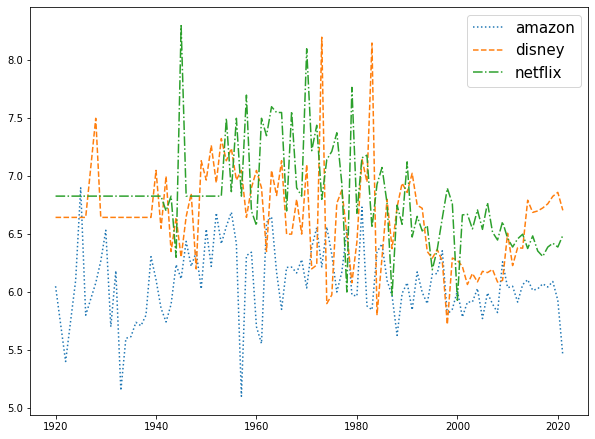

In [376]:
plt.rcParams["figure.figsize"] = (10,7.5)
plt.plot(plotting_data.release_year, plotting_data.amazon, label = 'amazon', linestyle = ':')
plt.plot(plotting_data.release_year, plotting_data.disney, label = 'disney', linestyle='--')
plt.plot(plotting_data.release_year, plotting_data.netflix, label = 'netflix', linestyle = 'dashdot')
plt.legend(prop={'size': 15})

In [369]:
plt.savefig('historic_ratings.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>